In [1]:
import sys
sys.path.insert(0, '..')

import random as rd
import math as mt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

In [2]:
import graph_class as gc

from algorithms import ALGO_brute_force as eduBF
from algorithms import fabian_bruteForce as fabBF
from algorithms import brute_force_marco as marBF
from algorithms import kris_brute_force as kriBF
from algorithms import greedy as gd
from algorithms import antColonyOptimization as aco
from algorithms import divideAndConquer as divc
from algorithms import branchAndBound as bnb
from algorithms import branchAndBoundBinaryTree as bnbt
from algorithms import ALGO_simulated_annealing as sa
from algorithms import dynamicProgramming as dp
from algorithms import GA_Final_Kris as ga
from algorithms.random_approach_script_final import randomized_approach as rando
from algorithms.twoopt_script_final import two_opt as o2
from algorithms import mst_dfs_hamiltonian_script_final as mst


In [3]:
def createCoords(nCoords):
    coords = [[rd.randint(1,100),rd.randint(1,100)] for x in range(nCoords)]
    return coords

In [4]:
# Transforms coordinates input into an adjacency matrix
def coordWrapper(coords):
    adj_mat = np.zeros([len(coords),len(coords)])
    for idx in range(len(coords)):
        adj_mat[idx,idx] = np.inf
        for idx2 in range(idx+1,len(coords)):
            adj_mat[idx,idx2] = pdist([coords[idx],coords[idx2]])
            adj_mat[idx2,idx] = pdist([coords[idx],coords[idx2]])
    return adj_mat

In [11]:
highN = 11
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])
t3 = np.zeros([highN-lowN,1])
t4 = np.zeros([highN-lowN,1])
t5 = np.zeros([highN-lowN,1])
t6 = np.zeros([highN-lowN,1])
t7 = np.zeros([highN-lowN,1])
t8 = np.zeros([highN-lowN,1])
t9 = np.zeros([highN-lowN,1])
t10 = np.zeros([highN-lowN,1])
t11 = np.zeros([highN-lowN,1])


for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, stuff, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)
    t2[idx-lowN], resK = kriBF.bruteForce(coords)
    t3[idx-lowN], resM = marBF.bruteForce(coords)
    t4[idx-lowN], resE, dummy = eduBF.brute_force(graph, 
                                                  max_iterations=mt.factorial(idx), 
                                                  return_graph=False)

    resM2, stuff, t8[idx-lowN] = bnb.BranchAndBound(graph)
    resM3, stuff, t9[idx-lowN] = bnbt.BranchAndBoundBinaryTree(graph)
    resM4, stuff, t10[idx-lowN] = divc.DivideAndConquer(graph)
    resM5, stuff, t11[idx-lowN] = dp.DynamicProgramming(graph)
    
    print("For", idx, "nodes:",resF, resK, resM, resE, resM3, resM4, resM5)

For 6 nodes: 193.0 193.43546460783742 193.43546460783742 193 193.0 193.0 193.0
For 7 nodes: 233.0 233.476069394782 233.476069394782 233 233.0 233.0 233.0
For 8 nodes: 271.0 272.24117081743884 272.24117081743884 271 271.0 271.0 271.0
For 9 nodes: 282.0 281.8608894100987 281.8608894100987 282 282.0 282.0 282.0
For 10 nodes: 340.0 339.7515982437729 339.7515982437729 340 340.0 340.0 340.0


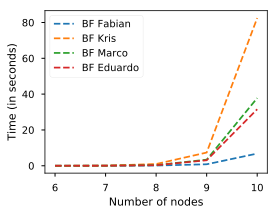

In [12]:
%config InlineBackend.figure_format = 'svg'

vals = np.transpose(np.squeeze([t1,t2,t3,t4]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['BF Fabian','BF Kris','BF Marco','BF Eduardo'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

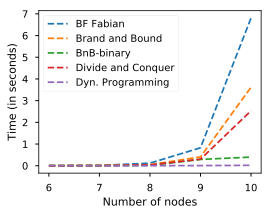

In [13]:
%config InlineBackend.figure_format = 'svg'

vals = np.transpose(np.squeeze([t1,t8,t9,t10,t11]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['BF Fabian','Brand and Bound','BnB-binary','Divide and Conquer','Dyn. Programming'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [14]:
highN = 13
lowN = 6
t1 = np.zeros([highN-lowN,1])
t2 = np.zeros([highN-lowN,1])

for idx in range(lowN,highN):
    coords = createCoords(idx)
    graph = gc.fully_connected_graph_from_coordinate_list(coords,)
    
    resF, pathF, t1[idx-lowN] = fabBF.bruteForce(graph, 
                                                 symmetric=True,
                                                 preload=False)

    resM2, pathM, t2[idx-lowN] = bnb.BranchAndBound(graph)
    
    if resF != resM2:
        print(graph.weighted_adjacency_matrix)
        print(pathF)
        print(pathM2)
    
    print("For", idx, "nodes:",resF, resM2)#, resM3)#, resM4, resM5)

For 6 nodes: 248.0 248.0
For 7 nodes: 213.0 213.0
For 8 nodes: 261.0 261.0
For 9 nodes: 327.0 327.0
For 10 nodes: 300.0 300.0
For 11 nodes: 287.0 287.0
For 12 nodes: 313.0 313.0


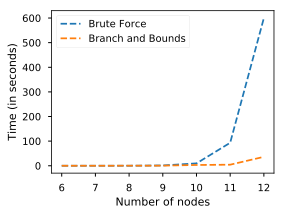

In [15]:
%config InlineBackend.figure_format = 'svg'

vals = np.transpose(np.squeeze([t1,t2]))
plt.figure(figsize=(4,3))
plt.plot(range(lowN,highN),list(vals), '--x')
plt.legend(['Brute Force','Branch and Bounds'])
plt.xlabel('Number of nodes')
plt.ylabel('Time (in seconds)')
plt.show()

In [5]:
# minpaths = pd.ExcelFile("../data/Symmetrical TSP/tsp_data_optimum_solutions.xlsx",header=None)
# for file in files:
#     data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
#     graph = gc.fully_connected_graph_from_coordinate_list(data)
    
#     print('name:          ',file[0])
#     print('optimal route: ',file[1])
#     print('greedy:        ',gd.greedy(graph=graph)[0])
#     #print('sim. annealing:',sa.simulated_annealing(graph=graph)[1])
#     print('ACO:           ',aco.antColonyOptimization(graph=graph, num_agents=20, max_iter=1000, 
#                                                       symmetric=True, alpha=1, beta=5, rho=.5)[0])
#     print()

name:           berlin52
optimal route:  7542
greedy:         9161.0
ACO:            7674.0

name:           bier127
optimal route:  118282
greedy:         148614.0
ACO:            125103.0

name:           ch130
optimal route:  6110
greedy:         7341.0
ACO:            6498.0

name:           ch150
optimal route:  6528
greedy:         7700.0
ACO:            6769.0

name:           d198
optimal route:  15780
greedy:         19558.0
ACO:            17298.0

name:           eil51
optimal route:  426
greedy:         557.0
ACO:            452.0

name:           eil76
optimal route:  538
greedy:         631.0
ACO:            558.0

name:           eil101
optimal route:  629
greedy:         851.0
ACO:            696.0

name:           gil262
optimal route:  2378
greedy:         3050.0
ACO:            2599.0

name:           kroA150
optimal route:  26524
greedy:         11642.0
ACO:            10410.0

name:           kroA200
optimal route:  29368
greedy:         36824.0
ACO:            329

## Reading in datasets

only considering datasets with <300 nodes at the moment

In [3]:
files = [['a280',2579],
         ['berlin52',7542],['bier127',118282],
         #['brd14051',np.inf]
         ['ch130',6110],['ch150',6528],
         ['d198',15780],
         #['d493',35002],['d657',48912],
         #['d1291',50801],['d1655',62128],['d18512',645238],
         ['eil51',426],['eil76',538],['eil101',629],
         #['fl417',11861],
         #['fl1400',20127],['fl1577',22249],['fl3795',28772],['fnl4461',182566],
         ['gil262',2378],['kroA150',26524],['kroA200',29368],['kroB100',22141],['kroB150',26130],['kroB200',29437],
         ['kroC100',20749],['kroD100',21294],['kroE100',22068],
         ['lin105',14379],
         #['lin318',42029],
         #['nrw1379',56638],
         #['p654',34643],['pcb442',50778],
         #['pcb1173',56892],
         ['pr76',108159],['pr107',44303],['pr124',59030],['pr136',96772],['pr144',58537],
         ['pr152',73682],
         ['pr226',80369],['pr264',49135],['pr299',48191],
         #['pr439',107217],
         #['pr1002',259045],['pr2392',378032],
         ['rat99',1211],['rat195',2323],
         #['rat575',6773],['rat783',8806],
         ['rd100',7910],
         #['rd400',15281],
         #['rl1304',252948],['rl1323',270199],['rl1889',316536],['rl5915',565530],['rl5934',556045],['rl11894',923288],
         ['ts225',126643],['u159',42080]
         #,['u574',36905],['u724',41910]#,
         #['u1060',224094],['u1432',152970],['u1817',57201],
         #['u2152',64253],['u2319',234256],['usa13509',19982859],['vm1084',239297],['vm1748',336556]
        ]

datasets = pd.ExcelFile("../data/Symmetrical TSP/all_data_euc2d.xlsx",header=None)

## Deterministic Algorithms

i.e. algorithms who always get the same result when called again.

In [5]:
res_deter = {}
res_deter['Dataset'] = []
res_deter['Greedy'] = []
res_deter['2-Opt'] = []
res_deter['DynamicProgramming'] = []
res_deter['BranchAndBound'] = []
res_deter['BnB-binary'] = []
res_deter['DivideAndConquer'] = []
res_deter['Hamiltonian'] = []

time_deter = {}
time_deter['Dataset'] = []
time_deter['Greedy'] = []
time_deter['2-Opt'] = []
time_deter['DynamicProgramming'] = []
time_deter['BranchAndBound'] = []
time_deter['BnB-binary'] = []
time_deter['DivideAndConquer'] = []
time_deter['Hamiltonian'] = []


for file in files:
    print("file:",file[0])
    data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
    graph = gc.fully_connected_graph_from_coordinate_list(data)
    res = gd.greedy(graph)
    res_deter['Dataset'].append(file[0])
    time_deter['Dataset'].append(file[0])
    res_deter['Greedy'].append(res[0])
    time_deter['Greedy'].append(res[2])
    res = o2(data)
    res_deter['2-Opt'].append(res[0])
    time_deter['2-Opt'].append(res[2])
    res = mst.mst_hamiltonian(graph)
#         total_distance = total_distance + adj_mat[city_1][city_2] INDEX ERROR
    res_deter['Hamiltonian'].append(res[0]) 
    time_deter['Hamiltonian'].append(res[2])
    res = dp.DynamicProgramming(graph) 
        MEMORY ERROR
    res_deter['DynamicProgramming'].append(res[0])
    time_deter['DynamicProgramming'].append(res[2])
    res = bnb.BranchAndBound(graph) 
#         g = np.min(A[:,[x-1 for x in rem_nodes + [1] if x!= i]]) ATTRIBUTE ERROR
    res_deter['BranchAndBound'].append(res[0])
    time_deter['BranchAndBound'].append(res[2])
    res = bnbt.BranchAndBoundBinaryTree(graph)
    res_deter['BnB-binary'].append(res[0])
    time_deter['BnB-binary'].append(res[2])
    res = divc.DivideAndConquer(graph)
    res_deter['DivideAndConquer'].append(res[0])
    time_deter['DivideAndConquer'].append(res[2])
    
resD = pd.DataFrame.from_dict(res_deter)
timeD = pd.DataFrame.from_dict(time_deter)

file: a280


KeyboardInterrupt: 

## Algorithms with random elements 

i.e. who get different results when called multiple times


In [4]:
res_randos = {}

res_randos = {}
res_randos['Dataset'] = []
res_randos['AntColony'] = []
res_randos['GeneticAlgorithm'] = []
res_randos['SimmulatedAnnealing'] = []
res_randos['RandomizedApproach'] = []

time_randos = {}
time_randos['Dataset'] = []
time_randos['AntColony'] = []
time_randos['GeneticAlgorithm'] = []
time_randos['SimmulatedAnnealing'] = []
time_randos['RandomizedApproach'] = []

for file in files:
    print(file[0])
    data = np.array(pd.read_excel(datasets,file[0],header=None).iloc[:,1:])
    graph = gc.fully_connected_graph_from_coordinate_list(data)
    acos = []
    gas = []
    sas = []
    ras = []
    for runs in range(5):
        gas.append(ga.GA_approach(graph))
        ras.append(rando(data))
        sas.append(sa.simulated_annealing(graph))
        acos.append(aco.antColonyOptimization(graph))
    res_randos['Dataset'].append(file[0])
    time_randos['Dataset'].append(file[0])
    res = [np.mean([idx[0] for idx in acos]), np.std([idx[0] for idx in acos])]
    time = [np.mean([idx[2] for idx in acos]), np.std([idx[2] for idx in acos])] 
    res_randos['AntColony'].append(res)
    time_randos['AntColony'].append(time)
    res = [np.mean([idx[0] for idx in gas]), np.std([idx[0] for idx in gas])]
    time = [np.mean([idx[2] for idx in gas]), np.std([idx[2] for idx in gas])]
    res_randos['GeneticAlgorithm'].append(res)
    time_randos['GeneticAlgorithm'].append(time)
    res = [np.mean([idx[0] for idx in sas]),np.std([idx[0] for idx in sas])]
    time = [np.mean([idx[2] for idx in sas]),np.std([idx[2] for idx in sas])]
    res_randos['SimmulatedAnnealing'].append(res)
    time_randos['SimmulatedAnnealing'].append(time)
    res = [np.mean([idx[0] for idx in ras]),np.std([idx[0] for idx in ras])]
    time = [np.mean([idx[2] for idx in ras]),np.std([idx[2] for idx in ras])]
    res_randos['SimmulatedAnnealing'].append(res)
    time_randos['SimmulatedAnnealing'].append(time)
    
    

a280


IndexError: index 243 is out of bounds for axis 0 with size 1

In [8]:
resD

,Dataset,Greedy,2-Opt
0,a280,3081.0,3020
1,berlin52,9161.0,7810
2,bier127,148614.0,136141
3,ch130,7341.0,6511
4,ch150,7700.0,7512
5,d198,19558.0,16700
6,eil51,557.0,486
7,eil76,631.0,661
8,eil101,851.0,768
9,gil262,3050.0,2740


In [9]:
import dill as pickle
from time import gmtime, strftime

t_stamp = gmtime()
file_Name = "../results/resDeterministic"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(resD, fileObject)  
fileObject.close() 

t_stamp = gmtime()
file_Name = "../results/timeDeterministic"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(timeD, fileObject)  
fileObject.close() 

In [21]:
t_stamp = gmtime()
file_Name = "../results/resRandom"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(resR, fileObject)  
fileObject.close() 

t_stamp = gmtime()
file_Name = "../results/timeRandom"+"_"+strftime("%Y-%m-%d_%H-%M-%S", t_stamp)
fileObject = open(file_Name, 'wb') 
pickle.dump(timeR, fileObject)  
fileObject.close() 

 Volume in drive C has no label.
 Volume Serial Number is 7879-C1F2

 Directory of C:\Users\fwalo\Documents\Git Projects\TSProject\benchmarking

05/12/2018  06:43    <DIR>          .
05/12/2018  06:43    <DIR>          ..
28/11/2018  13:59    <DIR>          .ipynb_checkpoints
05/12/2018  06:43           194,749 Benchmarking.ipynb
               1 File(s)        194,749 bytes
               3 Dir(s)  171,454,816,256 bytes free
